# Twitter Sentiment Analysis: Predicting Tweet Sentiments

## Introduction

In this project, we'll explore a dataset containing only three key attributes related to Twitter data:

1. **textID**: A unique identifier for each piece of text (tweet).
2. **text**: The actual content of the tweet.
3. **sentiment**: The general sentiment expressed in the tweet (e.g., positive, negative, neutral).

Our goal is to predict the sentiment associated with each analyzed tweet. To achieve this, we'll follow these steps:

### 1. Exploratory Data Analysis (EDA)

- We'll perform an initial exploration of the data, visualizing key information without diving into complex statistical analyses.
- EDA will help us understand patterns, distributions, and potential outliers.

### 2. Data Splitting

- We'll split the dataset into training and test sets.
- The training set will be used to train our models, while the test set will evaluate their performance.

### 3. Classification Algorithms

- We'll apply different data classification algorithms to predict tweet sentiments.
- Each algorithm will undergo hyperparameter tuning to optimize its performance.

### 4. Model Comparison

- After training the models, we'll compare their results.
- Which algorithm performs best? Are there trade-offs between accuracy and interpretability?

### 5. Model Evaluation and Interpretation

- We'll analyze the results of selected models.
- Can we explain the mistakes made by the models? What insights can we gain from misclassifications?

### 6. Project Discution

- We'll discuss potential limitations and ethical considerations related to the dataset and our approach.

## Dataset Source

The full dataset is available on Kaggle: [Twitter Tweets Sentiment Dataset](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset?datasetId=2066095)

---

## 1. Exploratory Data Analysis (EDA)


In [1]:
# Librarys import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loding the Kaggle downloaded data

In [2]:
tweets = pd.read_csv('Tweets.csv')
pd.set_option('display.max_colwidth', 1000) #Aumentando o limite de caracteres a ser mostrada nas colunas do df

### Creating a variable and saving it in the dataset

For this projects purposes the neutral and positive sentiments will be aggrouped. This way, there's only two possible outputs


In [3]:
#tweets['target'] = tweets.apply(lambda row: 1 if row.sentiment == "negative" else 0, axis=1)

In [4]:
tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative


### Checking the data for null values and unexpected data types

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [6]:
tweets.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [7]:
tweets[tweets.isnull().any(axis=1)]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [8]:
tweets.duplicated().sum()

0

In [9]:
tweets.shape

(27481, 4)

### Char number histograms for the tweets

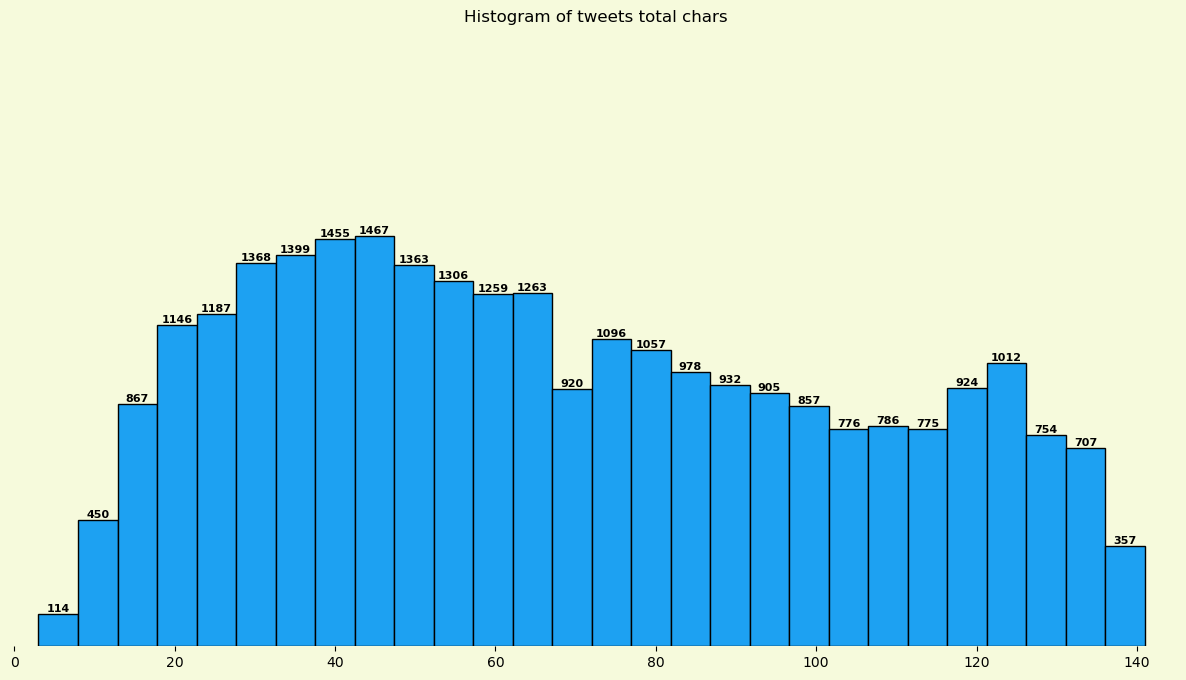

In [10]:
char_counts = tweets['text'].str.len()

plt.figure(figsize=(15,8),facecolor='#F6FADC')
hist, bins, _ = plt.hist(char_counts,
                         bins=28,
                         facecolor='#1DA1F2',
                         edgecolor='black')

for i, count in enumerate(hist):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, count, str(int(count)),
             fontsize=8, fontweight='bold', color='black',
             ha='center', va='bottom')  

plt.title('Histogram of tweets total chars')
plt.axis([0, 145, 0,2200])
plt.box(False)
plt.grid(False)
plt.yticks([])
plt.show()

* In this histogram is possible to see the tweet limit beeing reached in the 140 charachters

### Total words in tweet histogram

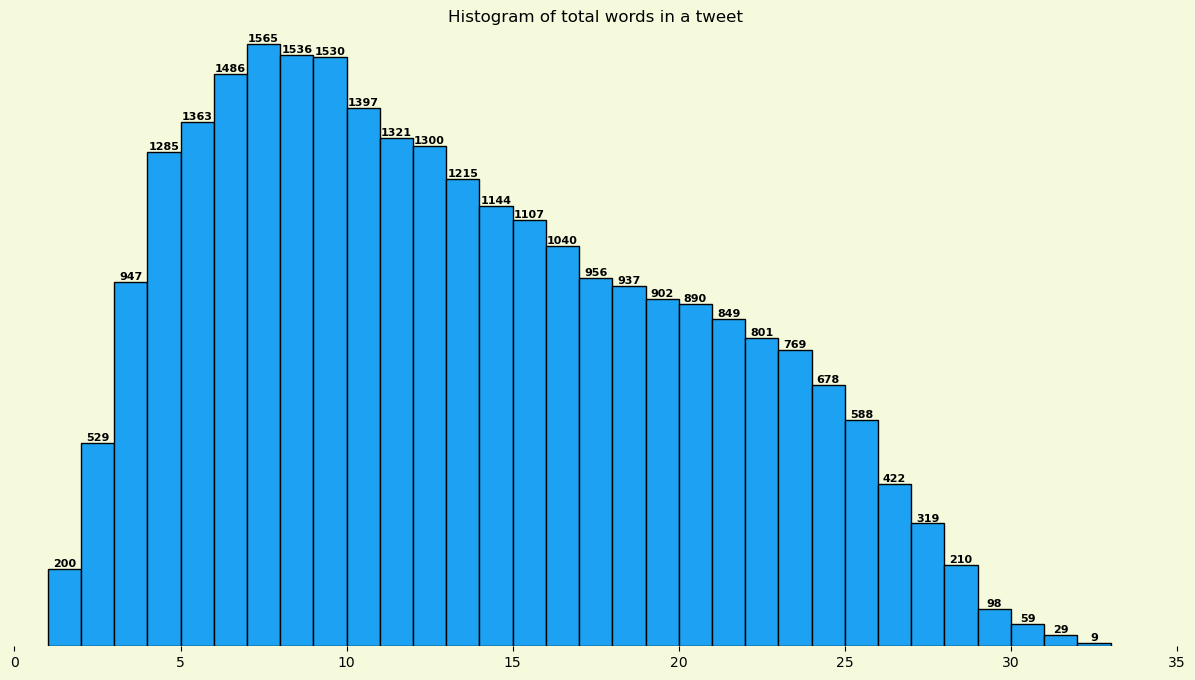

In [11]:
tot_words = tweets.text.astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(15, 8), facecolor='#F6FADC')

hist, bins, _ = plt.hist(tot_words,
                         bins=32,
                         facecolor='#1DA1F2',
                         edgecolor='black')

for i, count in enumerate(hist):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, count, str(int(count)),
             fontsize=8, fontweight='bold', color='black',
             ha='center', va='bottom')  

plt.title('Histogram of total words in a tweet')
plt.axis([0, 35, 0, 1600])
plt.box(False)
plt.grid(False)
plt.yticks([])

plt.show()

### Visualizing the longests and shorterst tweets in the db

In [12]:
l_t_index = char_counts.nlargest(5).index
longest_tweets = tweets.loc[l_t_index,['text','sentiment']]
s_t_index = char_counts.nsmallest(5).index
shortest_tweets = tweets.loc[s_t_index,['text','sentiment']]

print(longest_tweets)
print("")
print(shortest_tweets)

                                                                                                                                                text  \
3138   Is so freaking bored on the bus. Hate being poor, ï¿½4.80 return for a 10 min train or ï¿½2 return for an HOUR long bus.ipod has no battery 2   
27318  just saw an advert for ATTICS TO EDEN on tv  out today and only ï¿½9.99 from HMV...so I`m not sure why I had to pay ï¿½13 at HMV...never mind   
13896   Feeling madly sorry for myself... - ï¿½Iï¿½M SECK D= Make me feel better  I should be going to a fashion show... http://tumblr.com/xz31werch   
2582     TODAy SUCKs - kisskass19: ï¿½you and katey broke up?! Yah Kate Broke up with me  Itï¿½s been awful nd Vodkas... http://tumblr.com/xkx1wgl8r   
12456    Have ordered the cuuutest invitations for my new nieceï¿½s Christening, and they just arrived back in SA.  Sorry that I wont make it myself   

      sentiment  
3138   negative  
27318   neutral  
13896  negative  
2582   negative

### WordCloud considering all the tweets from the db

In [13]:
# Defining a image and verifing if it only contains pure black and white colors. It will be used to plot the wordcloud
from PIL import Image
twitter_mask = np.array(Image.open('./twitter_logo.jpg'))
twitter_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

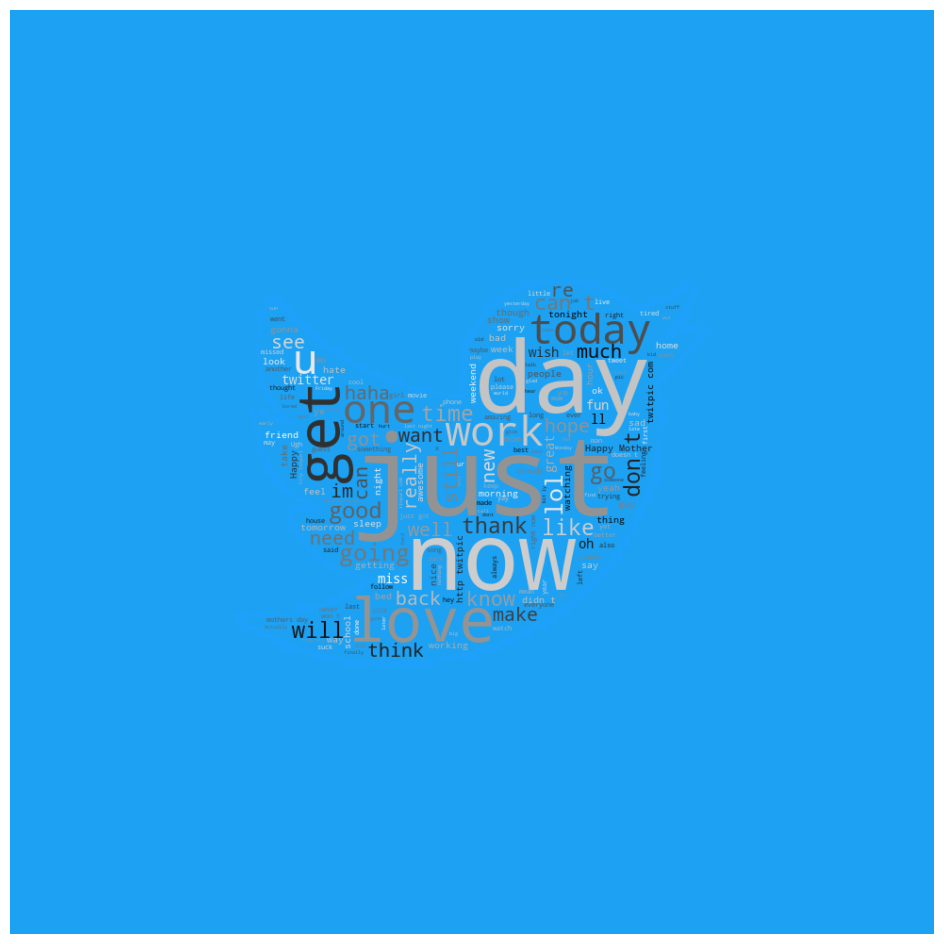

In [14]:
from wordcloud import WordCloud
from stop_words import get_stop_words
import os
text = tweets['text'].str.cat(sep=' ')

#Using this library to filter commmon/functional words such: "a", "to", the" ...  More info:https://communalytic.org/stop-words/#:~:text=The%20Word%20Cloud%20visualization%20shows,known%20as%20'stop%20words).
stop_words = get_stop_words('en')
stop_chars = ['m','n','s','d']
for char in stop_chars:
    stop_words.append(char)


wc = WordCloud(background_color='#1DA1F2', mask= twitter_mask, contour_width=2, contour_color='#1DA1FA', random_state = 42,colormap = 'binary', stopwords = stop_words).generate(text)
plt.figure(figsize=[12,12])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


#### Using only negative tweets

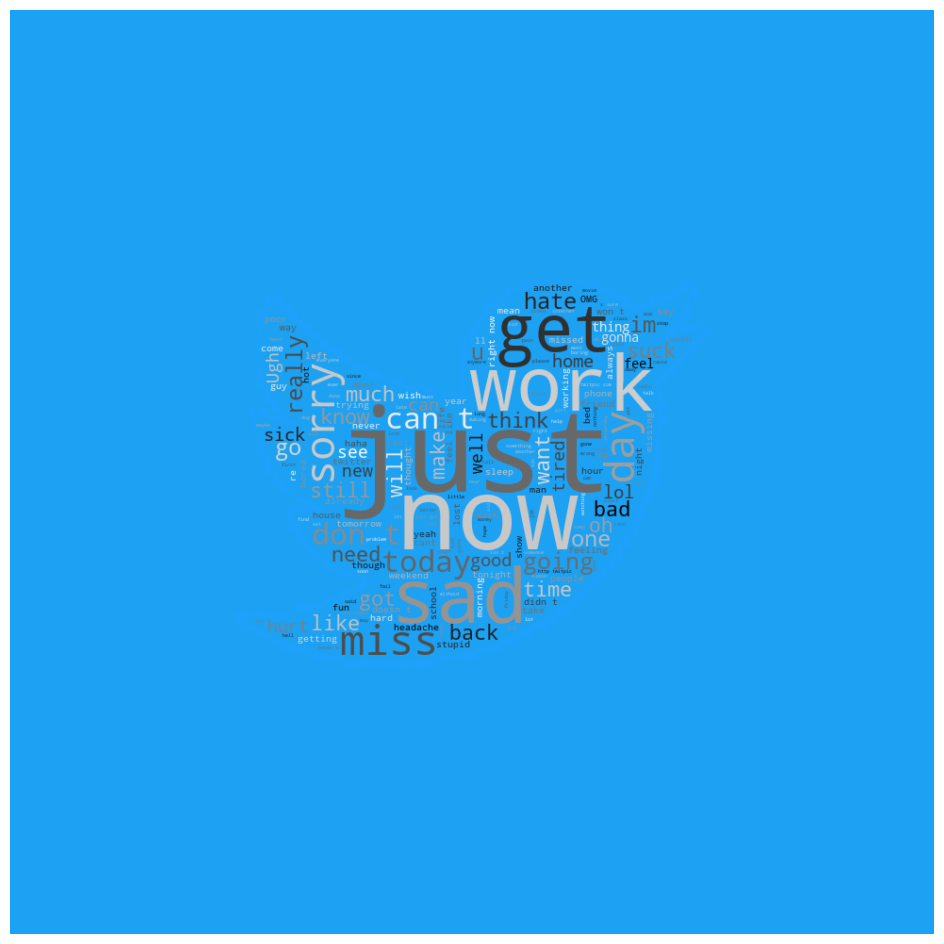

In [15]:
df_negative = tweets.loc[tweets['sentiment'] == 'negative']
text_negative = df_negative['text'].str.cat(sep=' ') 

wc = WordCloud(background_color='#1DA1F2', mask= twitter_mask, contour_width=2, contour_color='#1DA1FA', random_state = 42,colormap = 'binary', stopwords = stop_words).generate(text_negative)
plt.figure(figsize=[12,12])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Using only neutral tweets

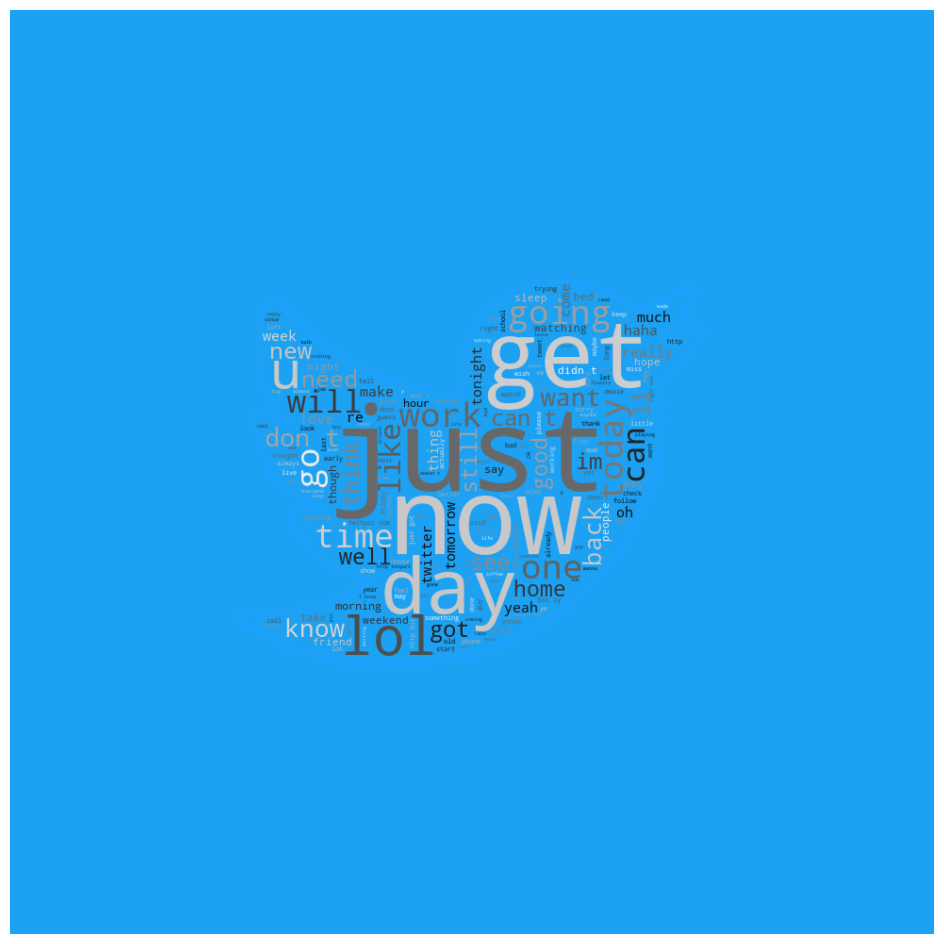

In [16]:
df_neutral = tweets.loc[tweets['sentiment'] == 'neutral']
text_neutral = df_neutral['text'].str.cat(sep=' ') 

wc = WordCloud(background_color='#1DA1F2', mask= twitter_mask, contour_width=2, contour_color='#1DA1FA', random_state = 42,colormap = 'binary', stopwords = stop_words).generate(text_neutral)
plt.figure(figsize=[12,12])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Using only positive tweets

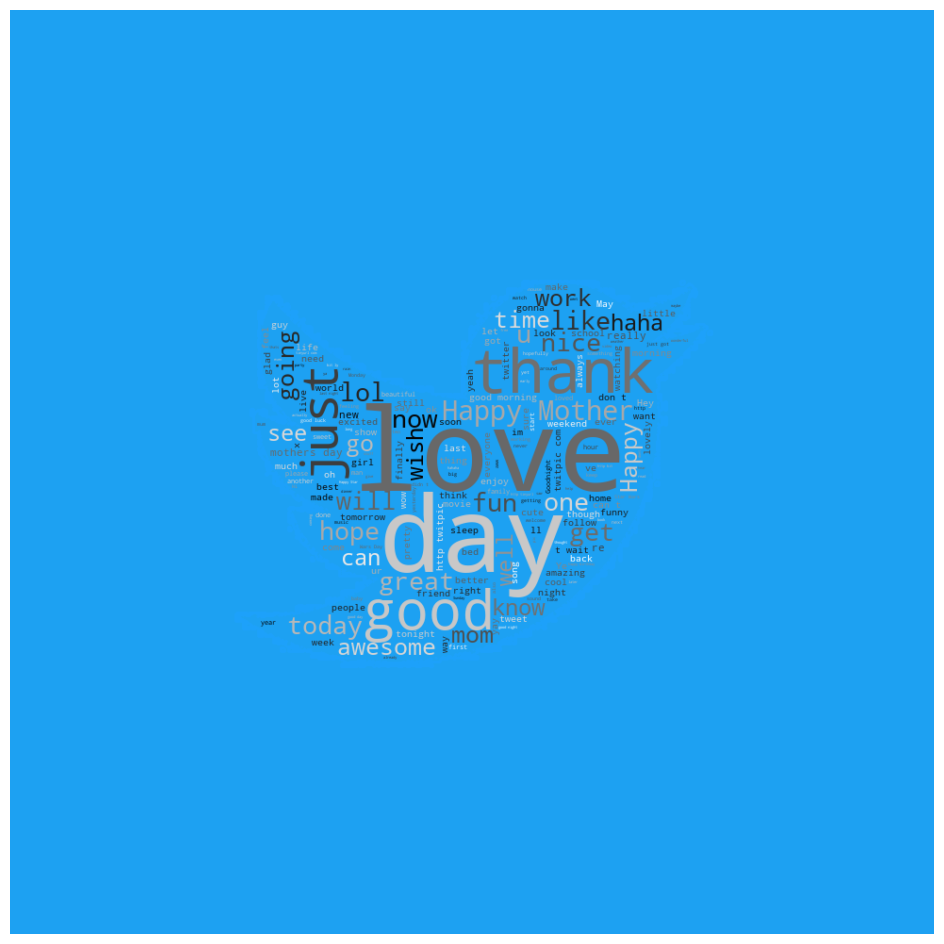

In [17]:
df_positive = tweets.loc[tweets['sentiment'] == 'positive']
text_positive = df_positive['text'].str.cat(sep=' ') 

wc = WordCloud(background_color='#1DA1F2', mask= twitter_mask, contour_width=2, contour_color='#1DA1FA', random_state = 42,colormap = 'binary', stopwords = stop_words).generate(text_positive)
plt.figure(figsize=[12,12])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Showing the distribution for the target variable 

#### Showing the distribution for the target variable in the original db

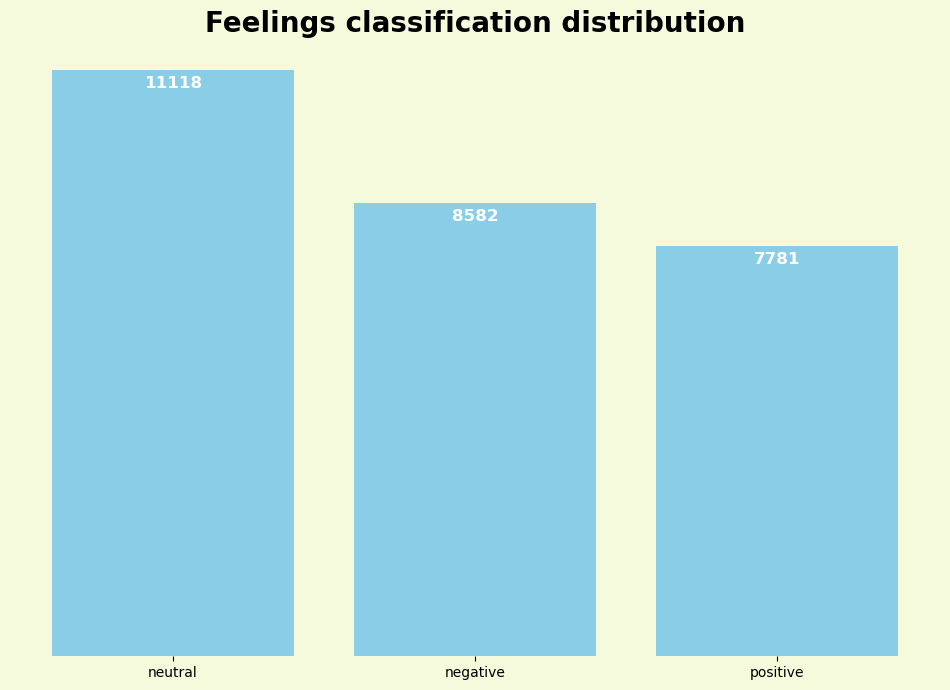

In [46]:
plt.figure(figsize=(12, 8),facecolor='#F6FADC')

tot_target = tweets['sentiment'].value_counts()

barras = plt.bar(
    tweets['sentiment'].unique().tolist(),
    tweets['sentiment'].value_counts(),
    color='#1DA1F2',
    alpha=0.50,
)

plt.bar_label(barras, fontsize=12, fontweight='bold', color='white', padding=-15)


plt.title('Feelings classification distribution',fontsize=20,fontweight='bold')

plt.box(False)
plt.grid(False)
plt.yticks([])

plt.show()

## 2. Data Cleaning and Splitting

### 1. Removing the dataset columns, keeping only the text and target ones

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

tweets_clean = tweets
tweets_clean['target'] = label_encoder.fit_transform(tweets_clean['sentiment'])
tweets_clean.tail()

,textID,text,selected_text,sentiment,target
27476,4eac33d1c0,wish we could come see u on Denver husband lost his job and can`t afford it,d lost,negative,0
27477,4f4c4fc327,"I`ve wondered about rake to. The client has made it clear .NET only, don`t force devs to learn a new lang #agile #ccnet",", don`t force",negative,0
27478,f67aae2310,Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend Take care hun xxxx,Yay good for both of you.,positive,2
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,2
27480,6f7127d9d7,All this flirting going on - The ATG smiles. Yay. ((hugs)),All this flirting going on - The ATG smiles. Yay. ((hugs),neutral,1


In [48]:
tweets_clean = tweets.drop(columns = ["textID","selected_text","sentiment"])
tweets_clean.head()

,text,target
0,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on the releases we already bought",0


### Dropping the null value from the database

In [49]:
tweets_clean = tweets_clean.dropna()

In [50]:
tweets_clean[tweets_clean.isnull().any(axis=1)] # Verificando se o valor foi retirado

,text,target


### Spliting 20% of the dataset for testing and separating the data in X and y
### The validation used will be K-fold, this way the validation and training sets are kept together

In [51]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(tweets_clean[['text']], tweets_clean['target'],
                                                            test_size=0.2, stratify=tweets_clean['target'], random_state=42)

## 3. Classification Algorithms and Hyperparams Tuning

### Pre-processing pipeline


In [52]:
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline 
from sklearn.feature_extraction.text import CountVectorizer

preprocessor = make_column_transformer(
    (CountVectorizer(), 'text'))

### 1. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = make_pipeline(preprocessor,LogisticRegression(max_iter=5000))
val_score = cross_val_score(model, X_train_val, y_train_val,cv=5,scoring='balanced_accuracy')

#print(model.get_params()) #Checking the name of the paramns from the model to be used in the param_grid
print("Balanced Accuracy:", np.mean(val_score))

Balanced Accuracy: 0.6822175812070397


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [1.0, 5.0, 10.0],
    'logisticregression__solver' : ['lbfgs','liblinear','newton-cg']
}

grid_search_logistic_regression = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='balanced_accuracy')
grid_search_logistic_regression.fit(X_train_val, y_train_val)

print("Best hyperparameters:", grid_search_logistic_regression.best_params_)
print("Best score:", grid_search_logistic_regression.best_score_)

Best hyperparameters: {'logisticregression__C': 1.0, 'logisticregression__solver': 'liblinear'}
Best score: 0.6876868949812845


### 2. Support Vector Machine (SVM)

In [37]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

* As the iteration limit was being exceeded multiple times in the tests and there is no possibility of normalization, the warnings were deactivated after the project was completed.

In [38]:
from sklearn.svm import SVC

model = make_pipeline(preprocessor,SVC(cache_size=1000,max_iter=3000))
val_score = cross_val_score(model, X_train_val, y_train_val,cv=5,scoring='balanced_accuracy')

#print(model.get_params()) #Checking the name of the paramns from the model to be used in the param_grid
print("Balanced Accuracy:", np.mean(val_score))

Balanced Accuracy: 0.6706272067451214


In [39]:
model = make_pipeline(preprocessor,SVC(cache_size=1000,max_iter=3000))

param_grid = {'svc__kernel': ["rbf","poly"],
              'svc__C': [0.001,0.01,0.1,1],
              'svc__gamma': [0.001,0.01,0.1,1]}

grid_search_svm = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='balanced_accuracy',verbose=1)
grid_search_svm.fit(X_train_val, y_train_val)

print("Best hyperparameters:", grid_search_svm.best_params_)
print("Best score:", grid_search_svm.best_score_)

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Best hyperparameters: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best score: 0.6601700271317013


### 3. Decision Tree Classifier


In [40]:
from sklearn.tree import DecisionTreeClassifier

model = make_pipeline(preprocessor,DecisionTreeClassifier())
val_score = cross_val_score(model, X_train_val, y_train_val,cv=5,scoring='balanced_accuracy')

#print(model.get_params()) #Checking the name of the paramns from the model to be used in the param_grid
print("Balanced Accuracy:", np.mean(val_score))

Balanced Accuracy: 0.6303492876667957


* As this model was taking a little more time than the other ones, the verbose was defined to make it easier to assure it was still running and progressing

In [41]:
model = make_pipeline(preprocessor,DecisionTreeClassifier())

param_grid = {'decisiontreeclassifier__max_depth':  [None,5,10],
              'decisiontreeclassifier__min_samples_split': [2, 5, 8],
                'decisiontreeclassifier__criterion': ['gini','entropy','log_loss']}
                
grid_search_tree = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='balanced_accuracy',verbose=10)
grid_search_tree.fit(X_train_val, y_train_val)

print("Best hyperparameters:", grid_search_tree.best_params_)
print("Best score:", grid_search_tree.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2
[CV 1/5; 1/27] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.625 total time=  13.9s
[CV 2/5; 1/27] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2
[CV 2/5; 1/27] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.622 total time=  14.7s
[CV 3/5; 1/27] START decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2
[CV 3/5; 1/27] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=

### 4. Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(preprocessor, RandomForestClassifier())

val_score = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='balanced_accuracy')

#print(model.get_params()) #Checking the name of the paramns from the model to be used in the param_grid
print("Balanced Accuracy :", np.mean(val_score))

Balanced Accuracy : 0.6711251070271897


In [60]:
model = make_pipeline(preprocessor, RandomForestClassifier())

param_grid = {'randomforestclassifier__n_estimators': [100,250], 
                   'randomforestclassifier__max_depth': [None,2,5],
               'randomforestclassifier__min_samples_split': [50,100]}

grid_search_forest = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='balanced_accuracy')
grid_search_forest.fit(X_train_val, y_train_val)

print("Best hyperparameters:", grid_search_forest.best_params_)
print("Best score:", grid_search_forest.best_score_)

Best hyperparameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 50, 'randomforestclassifier__n_estimators': 250}
Best score: 0.6711811892941999


### 5. Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

model = make_pipeline(preprocessor,GradientBoostingClassifier())
val_score = cross_val_score(model, X_train_val, y_train_val,cv=5,scoring='balanced_accuracy')

#print(model.get_params()) #Checking the name of the paramns from the model to be used in the param_grid
print("Balanced Accuracy:", np.mean(val_score))

Balanced Accuracy: 0.6171437645400358


In [45]:
model = make_pipeline(preprocessor,GradientBoostingClassifier())

param_grid = {'gradientboostingclassifier__max_depth': [5, 10, 12],
              'gradientboostingclassifier__n_estimators': [20, 50, 100],
              'gradientboostingclassifier__learning_rate': [0.3, 0.5, 0.8]}
                
grid_search_boost = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='balanced_accuracy')
grid_search_boost.fit(X_train_val, y_train_val)

print("Best hyperparameters:", grid_search_boost.best_params_)
print("Best score:", grid_search_boost.best_score_)

Best hyperparameters: {'gradientboostingclassifier__learning_rate': 0.3, 'gradientboostingclassifier__max_depth': 10, 'gradientboostingclassifier__n_estimators': 100}
Best score: 0.6833009651645987


## 4. Model Comparison

### 1. Logistic Regression

In [55]:
from sklearn.metrics import balanced_accuracy_score

best_C = grid_search_logistic_regression.best_params_['logisticregression__C']
best_solver = grid_search_logistic_regression.best_params_['logisticregression__solver']

best_model_logistic_regression = make_pipeline(preprocessor, LogisticRegression(max_iter=4000, C=best_C, solver = best_solver) )
best_model_logistic_regression.fit(X_train_val, y_train_val)

y_pred_test_logistic_regression = best_model_logistic_regression.predict(X_test)
balanced_acc_test = balanced_accuracy_score(y_test, y_pred_test_logistic_regression)
print("Balanced accuracy on test set:", balanced_acc_test)

Balanced accuracy on test set: 0.6840470887785947


### 2. Support Vector Machine (SVM)

In [162]:
best_kernel = grid_search_svm.best_params_['svc__kernel']
best_C = grid_search_svm.best_params_['svc__C']
best_gamma = grid_search_svm.best_params_['svc__gamma']

best_svc = SVC(max_iter=1000, C=best_C, gamma=best_gamma, kernel=best_kernel,verbose=10)
best_model_svc = make_pipeline(preprocessor, best_svc)
best_model_svc.fit(X_train_val, y_train_val)

y_pred_test = best_model_svc.predict(X_test)
balanced_acc_test = balanced_accuracy_score(y_test, y_pred_test)
print("Balanced accuracy on test set:", balanced_acc_test)

[LibSVM]Balanced accuracy on test set: 0.5426998999886132


* This models is having isues with overfitting, we can see that the trained model overperformed the test model by 18%

### 3. Decision Tree Classifier

In [163]:
best_max_depth = grid_search_tree.best_params_['decisiontreeclassifier__max_depth']
best_min_samples_split = grid_search_tree.best_params_['decisiontreeclassifier__min_samples_split']
best_crit = grid_search_tree.best_params_['decisiontreeclassifier__criterion']

best_decision_tree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split,criterion = best_crit)
best_model_decision_tree = make_pipeline(preprocessor, best_decision_tree)
best_model_decision_tree.fit(X_train_val, y_train_val)

y_pred_test = best_model_decision_tree.predict(X_test)
balanced_acc_test = balanced_accuracy_score(y_test, y_pred_test)
print("Balanced accuracy on test set:", balanced_acc_test)

Balanced accuracy on test set: 0.6426671831051435


### 4. Random Forest Classifier

In [61]:
best_max_depth = grid_search_forest.best_params_['randomforestclassifier__max_depth']
best_n_estimators = grid_search_forest.best_params_['randomforestclassifier__n_estimators']
best_min_samples_split = grid_search_forest.best_params_['randomforestclassifier__min_samples_split']

best_random_forest = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators, min_samples_split = best_min_samples_split)
best_model_random_forest = make_pipeline(preprocessor, best_random_forest)

best_model_random_forest.fit(X_train_val, y_train_val)

y_pred_test_random_forest = best_model_random_forest.predict(X_test)
balanced_acc_test = balanced_accuracy_score(y_test, y_pred_test_random_forest)
print("Balanced accuracy on test set:", balanced_acc_test)

Balanced accuracy on test set: 0.6713419418155743


### 5. Gradient Boosting Classifier

In [165]:
best_max_depth = grid_search_boost.best_params_['gradientboostingclassifier__max_depth']
best_n_estimators = grid_search_boost.best_params_['gradientboostingclassifier__n_estimators']
best_learning_rate = grid_search_boost.best_params_['gradientboostingclassifier__learning_rate']

best_gradient_boosting = GradientBoostingClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators, learning_rate=best_learning_rate)
best_model_gradient_boosting = make_pipeline(preprocessor, best_random_forest)

best_model_gradient_boosting.fit(X_train_val, y_train_val)

y_pred_test = best_model_gradient_boosting.predict(X_test)
balanced_acc_test = balanced_accuracy_score(y_test, y_pred_test)
print("Balanced accuracy on test set:", balanced_acc_test)

Balanced accuracy on test set: 0.6705453061259959


## 5. Model Evaluation and Interpretation

### 1. Using the best perfoming model
#### a. Showing the confusion matrix

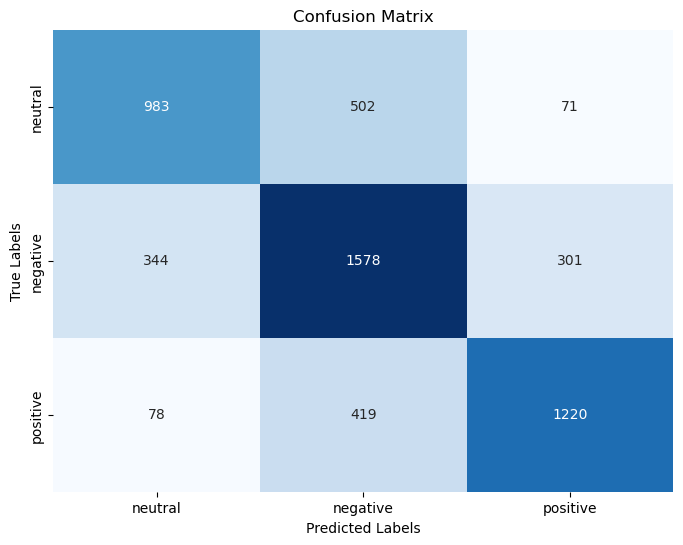

In [212]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, best_model_logistic_regression.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=tweets['sentiment'].unique().tolist(),
            yticklabels=tweets['sentiment'].unique().tolist())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### 2. Using Random Forest
#### a. The 10 most important words from the second best model

In [62]:
vectorizer = best_model_random_forest.named_steps['columntransformer'].named_transformers_['countvectorizer']

# Obtendo os nomes das features (palavras)
feature_names = vectorizer.get_feature_names_out()

top_10_words = feature_names[np.argsort(best_model_random_forest.named_steps['randomforestclassifier'].feature_importances_)[::-1]][:10]
print("Ten most relevant words:")
print(top_10_words)

Ten most relevant words:
['love' 'good' 'happy' 'thanks' 'miss' 'sad' 'great' 'sorry' 'nice'
 'awesome']


* It makes sense that words like this indicate more strongly to the model some of the feelings. For example: happy, love

In [63]:
vectorizer = best_model_logistic_regression.named_steps['columntransformer'].named_transformers_['countvectorizer']

# Obtenha os coeficientes do modelo
coefficients = best_model_logistic_regression.named_steps['logisticregression'].coef_

# Exiba as dez palavras mais relevantes
top_10_words_indices = np.argsort(coefficients[0])[::-1][:10]
top_10_words = np.array(feature_names)[top_10_words_indices]
print("Ten most relevant words:")
print(top_10_words)

Ten most relevant words:
['sad' 'sucks' 'headache' 'stupid' 'sorry' 'fail' 'bored' 'exhausted'
 'miss' 'hate']


* Interesting to note that this model does not have any positive word in the ranking of the most relevant. Possibly showing that "negative" words indicate more robustly the negative part of a tweet

#### b. Finding cases that the model was not abble to classificate corectly

In [231]:
predictions = pd.DataFrame(X_test['text'])
predictions['y_test'] = y_test
predictions['y_pred'] = y_pred_test_random_forest

df_wrong = predictions[predictions['y_test'] != predictions['y_pred']]

print(df_wrong.tail())

                                                                                  text  \
19695                            ... Yay! I can give you a lesson tomorrow, at Church.   
18310                    Why are all the cool classes being offered this summer?  Boo.   
16013                           I think he thought about it, but then I sneezed on him   
11898                                  That is messed up. I hope your day gets better.   
16889  Chilling with Colton who just redesigned the Cocktail Hacker card backs for me.   

       y_test  y_pred  
19695       2       1  
18310       1       2  
16013       0       1  
11898       1       2  
16889       2       1  


## 6. Project Discution

* A using K-fold validation makes a more robust and less complex set, but has the disavantage in the computional power needed.

* When analyzing random forest errors, we can see that some words have high weights for the model, for instance in:"That is messed up. I hope your day gets better." The word better may have caused the algorithm to classify it as positive. It is also noticeable that the model has difficulty interpreting ironic, sarcastic or double-meaning sentences. As the comparison is made using words, the interpretation is impaired.

* Thinking about data collection, it depends on being initially classified by human beings, which generates work and subjects the sentences to personal interpretations. For example, if classified by a person with not much ability to perceive irony or context, the target base would be harmed. For example in: "Why are all the cool classes being offered this summer?  Boo." could be classified as a negative tweet.